In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-sindhi'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df[class_names].values
val_labels = val_df[class_names].values
test_labels = test_df[class_names].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

ÿ™ŸàŸáÿßŸÜ ⁄™Ÿäÿ± ⁄Ñÿß⁄ªŸà Ÿøÿß ÿ™Ÿá ŸÖŸàÿ¨ŸàŸÜ ⁄ØŸáŸΩ ŸÑ⁄ô €æ Ÿ∫ÿßŸáŸäŸÜÿØÿß ÿ¢ŸáŸÜ?  dbo‚Äôd yo bitch Ÿáÿß⁄ªŸä ŸáŸàÿ°Ÿé ÿßÿ≥ÿßŸÜ ÿ¨Ÿä ŸªŸÜŸáŸä (nigga) [0 0 0 1 0]
ÿßŸáÿß ⁄™⁄ÜŸä ŸÖ⁄™ŸÖŸÑ ŸÜÿ∏ÿ± ÿß⁄ÜŸä ŸøŸä https://t.co/L17zFSuqGQ [0 1 0 0 0]
ÿßÿ≥ÿßŸÜ Ÿáÿß⁄ªŸä ÿ≥⁄ÄŸÜŸä ŸæŸÑŸäŸΩ ŸÅÿßÿ±ŸÖŸÜ ÿ™Ÿä ÿ¢ŸáŸäŸàŸÜÿå ÿ™ŸÜŸáŸÜ⁄™ÿ±Ÿä ÿßŸäŸÜÿØ⁄ô ⁄ÄŸäÿ±Ÿä ÿ™ŸàŸáÿßŸÜ Ÿá⁄™ ÿÆÿ±ÿßÿ® ⁄™⁄ÜŸäÿå Ÿá⁄™ ÿÆŸàÿ®ÿµŸàÿ±ÿ™ ÿπŸàÿ±ÿ™ÿå ÿ¨Ÿä⁄™Ÿà ÿ™ŸàŸáÿßŸÜ ⁄ÜÿßŸáŸäŸà Ÿøÿß. ÿ±ÿßŸÜÿØ ⁄™ÿ±ŸäŸà FIHTEEN ÿ™Ÿá ÿ¨Ÿäÿ¶ŸÜ ŸáŸàÿ° ÿ™ŸàŸáÿßŸÜ ⁄©Ÿä ŸÖÿÆÿ™ŸÑŸÅ ⁄Ñÿß⁄ªŸä ÿ≥⁄ØŸáŸä [0 1 0 0 0]
ÿ®ÿ≥ Ÿá⁄™ Ÿàÿßÿ± ⁄™ŸΩŸäŸàÿå ⁄™Ÿà ÿ®Ÿá ŸÖŸàŸÜ ⁄©Ÿä ŸÖŸÜŸáŸÜÿ¨Ÿä ⁄™⁄ÜŸä ŸÖÿßŸÜ ŸàŸ∫Ÿä ÿ≥⁄ØŸáŸä ŸøŸà [0 1 0 0 0]
@barnlife5 @realShawNshawN @grantstern ÿ¨Ÿä⁄™⁄èŸáŸÜ ÿ™ŸàŸáÿßŸÜ ÿ≥⁄Ä ⁄™ÿ¨ŸáŸá ŸÖÿ≠ÿ≥Ÿàÿ≥ ⁄™ŸäŸà ÿ™Ÿá ŸæŸàÿ°Ÿê ÿßŸáŸà ⁄™ÿ±ŸäŸà.  ŸΩÿ±ŸÖŸæ ŸàŸΩ ÿ®ÿßŸÑÿ≤ ÿ¢ŸáŸÜ ÿ¨Ÿä⁄™Ÿä ⁄™ÿ±⁄ª ŸÑÿßÿ°Ÿê ÿ¨ŸÖŸáŸàÿ±Ÿäÿ™ Ÿæÿ≥ŸÜÿØ ⁄ÜÿßŸáŸäŸÜ Ÿøÿß ÿ™Ÿá ÿßŸáŸä ⁄™ÿ±Ÿä ÿ≥⁄ØŸáŸÜ.  Ÿæÿ± ŸÑÿ®ÿ±ŸÑ €Ω ÿ¨ŸÖŸáŸàÿ±Ÿäÿ™ Ÿæÿ≥ŸÜÿØ ŸÜÿ±ŸÖ ÿ¢ŸáŸÜ €Ω ŸÖŸÜÿ≥ŸàÿÆ ŸøŸä⁄ª ⁄©ÿßŸÜ ÿÆŸàŸÅ

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

⁄Ñÿß⁄ªŸà Ÿøÿß ÿ™Ÿá ŸÖŸàÿ¨ŸàŸÜ ⁄ØŸáŸΩ ŸÑ⁄ô €æ Ÿ∫ÿßŸáŸäŸÜÿØÿß dbo‚Äôd yo bitch Ÿáÿß⁄ªŸä ŸáŸàÿ°Ÿé ÿßÿ≥ÿßŸÜ ÿ¨Ÿä ŸªŸÜŸáŸä nigga [0 0 0 1 0]
ÿßŸáÿß ⁄™⁄ÜŸä ŸÖ⁄™ŸÖŸÑ ŸÜÿ∏ÿ± ÿß⁄ÜŸä ŸøŸä [0 1 0 0 0]
ÿßÿ≥ÿßŸÜ Ÿáÿß⁄ªŸä ÿ≥⁄ÄŸÜŸä ŸæŸÑŸäŸΩ ŸÅÿßÿ±ŸÖŸÜ ÿ¢ŸáŸäŸàŸÜÿå ÿ™ŸÜŸáŸÜ⁄™ÿ±Ÿä ÿßŸäŸÜÿØ⁄ô ⁄ÄŸäÿ±Ÿä ÿÆÿ±ÿßÿ® ⁄™⁄ÜŸäÿå ÿÆŸàÿ®ÿµŸàÿ±ÿ™ ÿπŸàÿ±ÿ™ÿå ÿ¨Ÿä⁄™Ÿà ⁄ÜÿßŸáŸäŸà Ÿøÿß ÿ±ÿßŸÜÿØ ⁄™ÿ±ŸäŸà fihteen ÿ™Ÿá ŸáŸàÿ° ⁄©Ÿä ⁄Ñÿß⁄ªŸä ÿ≥⁄ØŸáŸä [0 1 0 0 0]
ÿ®ÿ≥ Ÿàÿßÿ± ⁄™ŸΩŸäŸàÿå ⁄™Ÿà ŸÖŸàŸÜ ⁄©Ÿä ŸÖŸÜŸáŸÜÿ¨Ÿä ⁄™⁄ÜŸä ŸàŸ∫Ÿä ÿ≥⁄ØŸáŸä ŸøŸà [0 1 0 0 0]
barnlife5 realshawnshawn grantstern ÿ¨Ÿä⁄™⁄èŸáŸÜ ÿ≥⁄Ä ⁄™ÿ¨ŸáŸá ŸÖÿ≠ÿ≥Ÿàÿ≥ ⁄™ŸäŸà ÿ™Ÿá ŸæŸàÿ°Ÿê ⁄™ÿ±ŸäŸà ŸΩÿ±ŸÖŸæ ŸàŸΩ ÿ®ÿßŸÑÿ≤ ÿ¨Ÿä⁄™Ÿä ŸÑÿßÿ°Ÿê ÿ¨ŸÖŸáŸàÿ±Ÿäÿ™ Ÿæÿ≥ŸÜÿØ ⁄ÜÿßŸáŸäŸÜ Ÿøÿß ÿ™Ÿá ⁄™ÿ±Ÿä ÿ≥⁄ØŸáŸÜ Ÿæÿ± ŸÑÿ®ÿ±ŸÑ ÿ¨ŸÖŸáŸàÿ±Ÿäÿ™ Ÿæÿ≥ŸÜÿØ ŸÜÿ±ŸÖ ŸÖŸÜÿ≥ŸàÿÆ ⁄©ÿßŸÜ ÿÆŸàŸÅÿ≤ÿØŸá Ÿäÿß Ÿæÿ±Ÿä ⁄©ÿßŸªŸä ŸÜŸá ÿ¨Ÿá⁄™ŸÜÿØÿß üòÇüòÇy ÿ≥⁄Ä ⁄ØŸàŸÜ⁄Øÿß ÿ™Ÿá ŸÖÿ≤ÿßÿ≠ŸäŸá ÿ¢ŸáŸä [0 0 0 1 0]


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:26<00:00,  2.80it/s, loss=0.116] 


Train loss 0.20766314255127769 accuracy 0.7123211963589077
Validation loss 0.1387853533213521 accuracy 0.8442559001365321
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.8442559001365321
Epoch 1/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.83it/s, loss=0.0795]


Train loss 0.1277203353670623 accuracy 0.8372236671001301
Validation loss 0.12016586159114484 accuracy 0.8371367271308757
No improvement in validation accuracy for 1 epochs.
Epoch 2/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.82it/s, loss=0.0548]


Train loss 0.11054930489711247 accuracy 0.8595903771131339
Validation loss 0.11718050997566294 accuracy 0.8295299395357909
No improvement in validation accuracy for 2 epochs.
Epoch 3/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.83it/s, loss=0.0297]


Train loss 0.09628256483011226 accuracy 0.877925877763329
Validation loss 0.12950870468292708 accuracy 0.857421494051102
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.857421494051102
Epoch 4/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.82it/s, loss=0.0361]


Train loss 0.08512012994388327 accuracy 0.8967165149544863
Validation loss 0.1390110190819811 accuracy 0.8401599375853326
No improvement in validation accuracy for 1 epochs.
Epoch 5/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.83it/s, loss=0.035] 


Train loss 0.0752309090631755 accuracy 0.912483745123537
Validation loss 0.1616784064674083 accuracy 0.8378193875560757
No improvement in validation accuracy for 2 epochs.
Epoch 6/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.83it/s, loss=0.0169]


Train loss 0.06614513205232957 accuracy 0.9265279583875162
Validation loss 0.1343353595814587 accuracy 0.8658084649892724
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.8658084649892724
Epoch 7/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:27<00:00,  2.76it/s, loss=0.0262]


Train loss 0.05594513574962918 accuracy 0.9413849154746424
Validation loss 0.14803334279560748 accuracy 0.8733177296664716
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.8733177296664716
Epoch 8/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:28<00:00,  2.73it/s, loss=0.0126]


Train loss 0.05016247396013425 accuracy 0.9481144343302991
Validation loss 0.148413724001543 accuracy 0.8731226838307002
No improvement in validation accuracy for 1 epochs.
Epoch 9/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:26<00:00,  2.80it/s, loss=0.00981]


Train loss 0.042018275124434366 accuracy 0.9580299089726918
Validation loss 0.17242190444175107 accuracy 0.8641505753852156
No improvement in validation accuracy for 2 epochs.
Epoch 10/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.82it/s, loss=0.00967]


Train loss 0.03753463609561448 accuracy 0.9625487646293888
Validation loss 0.1795590435281212 accuracy 0.8589818607372732
No improvement in validation accuracy for 3 epochs.
Epoch 11/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:25<00:00,  2.80it/s, loss=0.00412]


Train loss 0.03021833581919492 accuracy 0.9707087126137841
Validation loss 0.19053150851417472 accuracy 0.8657109420713868
No improvement in validation accuracy for 4 epochs.
Epoch 12/50
----------


Training Progress: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 241/241 [01:26<00:00,  2.79it/s, loss=0.0102] 


Train loss 0.027762301656498702 accuracy 0.9735370611183355
Validation loss 0.20846270972195965 accuracy 0.86268773161693
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


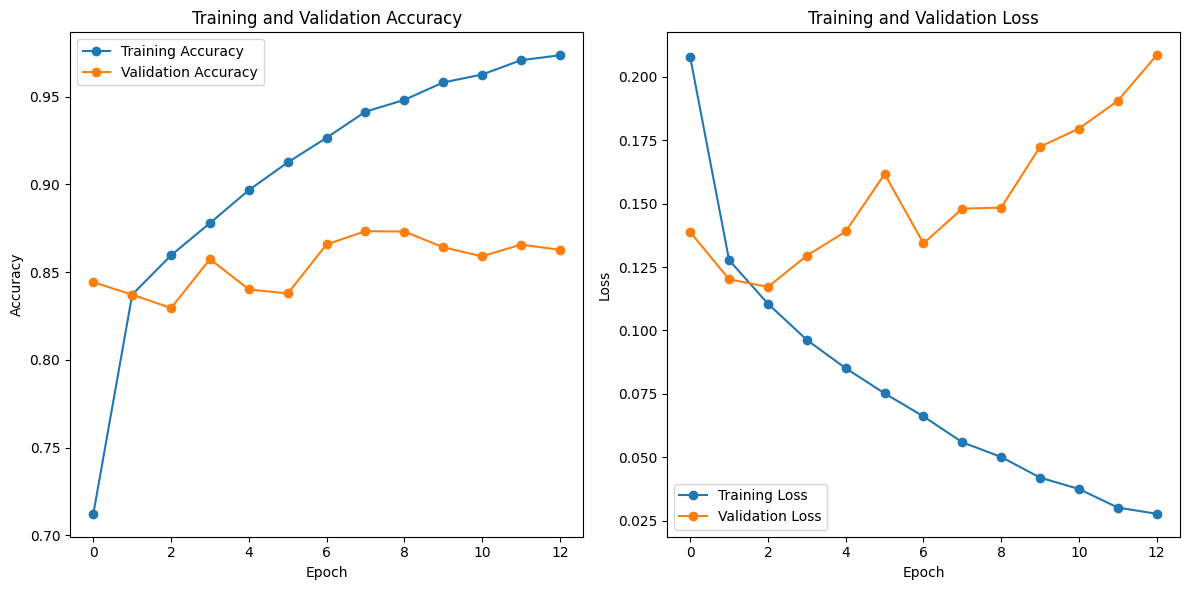

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.86 Test Loss: 0.20903699826679112


Accuracy: 0.87
F1 Score: 0.86
Precision: 0.86
Recall: 0.87

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.38      0.20      0.26       128
     Gender/Sexual       0.83      0.87      0.85      3298
Origin/Nationality       0.48      0.52      0.50       123
    Race/Ethnicity       0.90      0.85      0.87      3657
          Religion       0.89      0.93      0.91      3048

          accuracy                           0.87     10254
         macro avg       0.70      0.67      0.68     10254
      weighted avg       0.86      0.87      0.86     10254



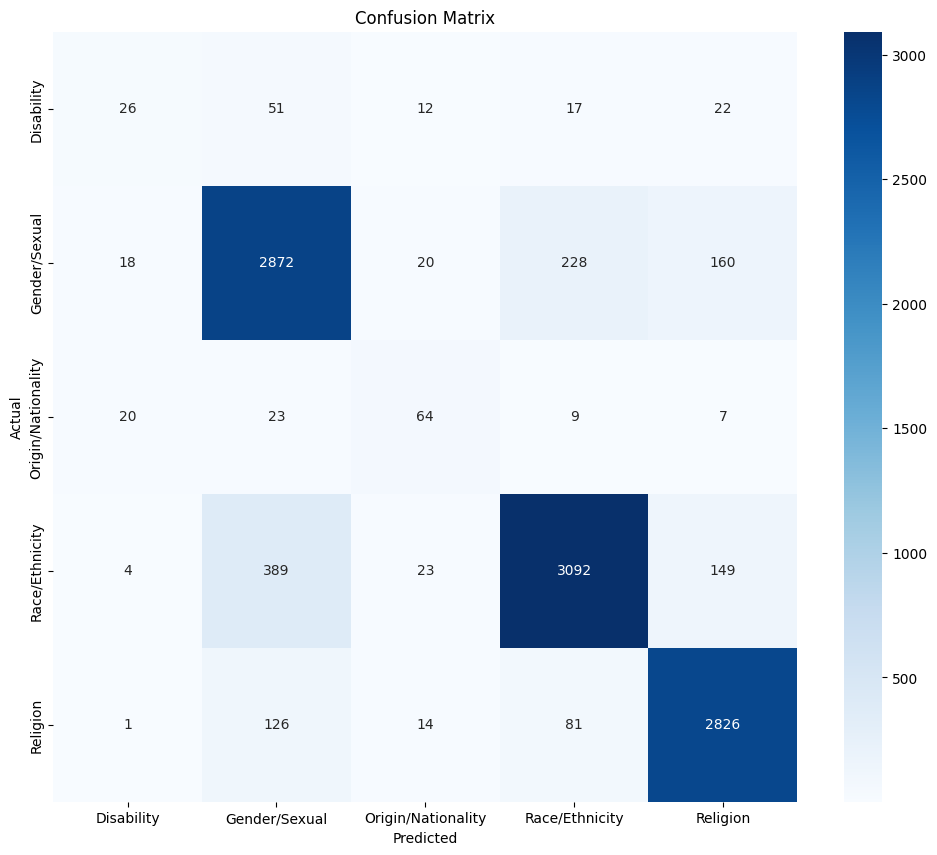

In [11]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 0.99
